In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Moving Average

First, let's have a look in our data

In [21]:
df = pd.read_csv('data/company_A.csv')
df['Date'] = pd.to_datetime(df['Date'])
#df_apple.set_index('Date', inplace=True)

In [22]:
df.head()

Date       Open       High        Low      Close  Adj Close     Volume
0 2010-01-08  30.042856  30.285715  29.865715  30.282858  20.279305  111902700
1 2010-01-11  30.400000  30.428572  29.778572  30.015715  20.100410  115557400
2 2010-01-12  29.884285  29.967142  29.488571  29.674286  19.871763  148614900
3 2010-01-13  29.695715  30.132856  29.157143  30.092857  20.152065  151473000
4 2010-01-14  30.015715  30.065714  29.860001  29.918571  20.035355  108223500

In [23]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean     99.667201   100.543014    98.733814    99.656863    89.254498   
std      46.723040    47.118592    46.343423    46.733782    52.028891   
min      27.481428    28.000000    27.178572    27.435715    18.372683   
25%      61.861787    62.445713    61.226072    61.678571    46.170139   
50%      94.770001    95.689999    93.717144    94.705002    86.985355   
75%     126.099998   127.134998   125.084999   126.050001   118.326685   
max     230.779999   233.470001   229.779999   232.070007   231.263092   

             Volume  
count  2.264000e+03  
mean   7.998436e+07  
std    5.963709e+07  
min    1.147590e+07  
25%    3.441850e+07  
50%    6.317255e+07  
75%    1.076106e+08  
max    4.702495e+08

## Visualising the data

In [24]:
import plotly.offline as plo
import plotly.graph_objs as go
plo.init_notebook_mode()

In [25]:
x1=df.Date
y1=df.Close
data = [go.Scatter(x=x1, y=y1)]
layout = go.Layout(
   xaxis=dict(
       range=['10-01-2010','03-01-2019'],
       title='Ano'              
   ),
   yaxis=dict(
       range=[min(x1), max(y1)],
       title='Valor da Acao'
   ))
fig = go.Figure(data = data, layout = layout)
plo.iplot(fig)

## Apling the Moving Average

In [26]:
#Filter the df
df = pd.DataFrame(df[['Close','Date']])
df.set_index('Date', inplace=True)

In [27]:
df['MA_window_10'] = df['Close'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
df['MA_window_20'] = df['Close'].rolling(20).mean().shift() 

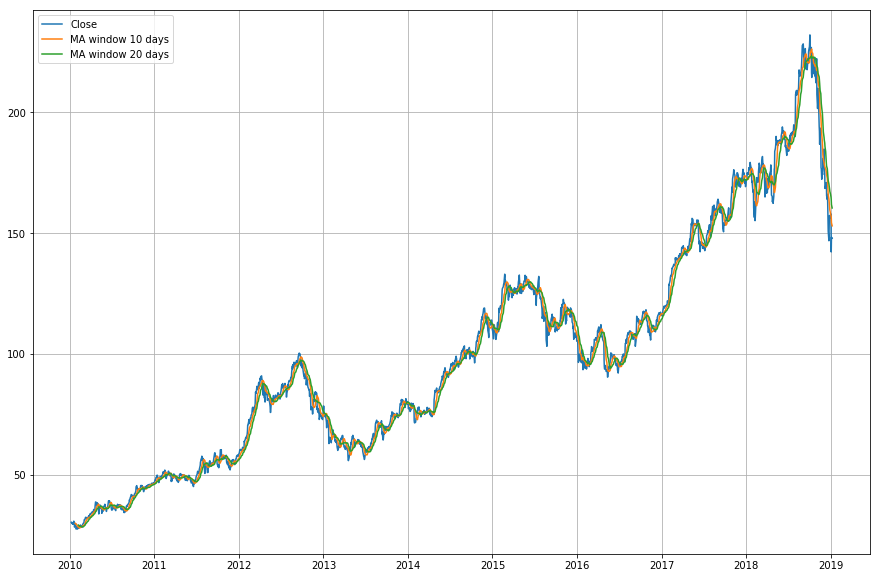

In [28]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'], label='Close')
plt.plot(df['MA_window_10'], label='MA window 10 days')
plt.plot(df['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

Looking closer to the most recent days

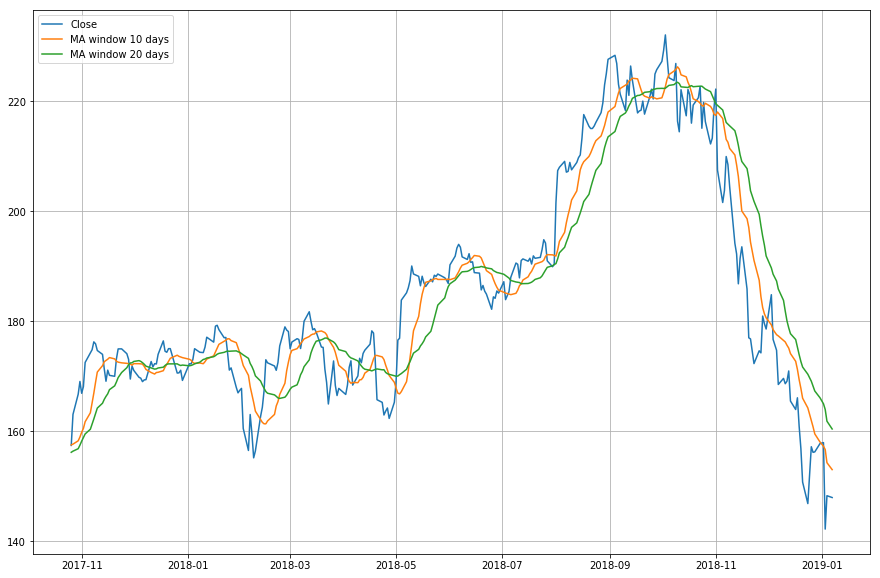

In [59]:
limit = 300

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'][-limit:], label='Close')
plt.plot(df['MA_window_10'][-limit:], label='MA window 10 days')
plt.plot(df['MA_window_20'][-limit:], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

### Predicting `n` days in a row with MA

Now, we will try to forcast the period of `n`days (`forward_days`)

In [54]:
df['MA_window_10_forward_10'] = np.NaN

In [55]:
def make_window(window_size, start_point):
    return [start_point+x for x in range(window_size)]

In [56]:
window_size = 10
forward_days = 10 # > 1, ou seja, 2,3,4,5,...
for index in range(window_size, len(df), forward_days):
    for i in range(0,forward_days):
        if index+i >= len(df):
            break
        window_close = make_window(window_size-i, index+i-window_size)
        #print(window_close)
        window_MA = make_window(i, index)
        #print(window_MA)
        mean = pd.concat([ df['Close'].iloc[window_close], df['MA_window_10_forward_10'].iloc[window_MA] ]).mean(axis=0)
        df.iat[index+i, df.columns.get_loc('MA_window_10_forward_10')] = mean

In [57]:
df.head(20)

Close  MA_window_10  MA_window_20  MA_window_10_forward_10
Date                                                                      
2010-01-08  30.282858           NaN           NaN                      NaN
2010-01-11  30.015715           NaN           NaN                      NaN
2010-01-12  29.674286           NaN           NaN                      NaN
2010-01-13  30.092857           NaN           NaN                      NaN
2010-01-14  29.918571           NaN           NaN                      NaN
2010-01-15  29.418571           NaN           NaN                      NaN
2010-01-19  30.719999           NaN           NaN                      NaN
2010-01-20  30.247143           NaN           NaN                      NaN
2010-01-21  29.724285           NaN           NaN                      NaN
2010-01-22  28.250000           NaN           NaN                      NaN
2010-01-25  29.010000     29.834429           NaN                29.834429
2010-01-26  29.420000     29.707143           NaN                29.789586
2010-01-27  29.697144     29.647571           NaN                29.766973
2010-01-28  28.469999     29.649857           NaN                29.776241
2010-01-29  27.437143     29.487571           NaN                29.744580
2010-02-01  27.818571     29.239428           NaN                29.727181
2010-02-02  27.980000     29.079428           NaN                29.758042
2010-02-03  28.461428     28.805429           NaN                29.661846
2010-02-04  27.435715     28.626857           NaN                29.603316
2010-02-05  27.922857     28.398000           NaN                29.591219

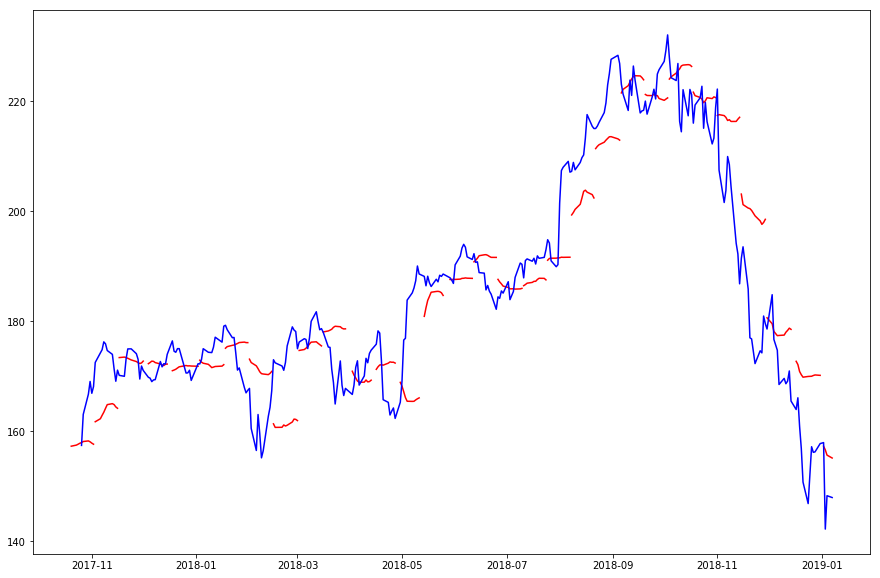

In [85]:
plt.figure(figsize = (15,10))

size = len(df)-limit - (len(df)-limit)%forward_days

for index in range(size, len(df), forward_days):
    plt.plot(df['MA_window_10_forward_10'][index:index+forward_days], color='r')
    
plt.plot(df['Close'][-limit:], color='b', label='Close')
#plt.legend(loc='best')
plt.show()

### Exponential Moving Avarege

In [70]:
df['EMA_DayByDay'] = np.NaN

In [72]:
window_size = 10
multiplier = 2 / (window_size + 1)  #multiplier: (2 / (Time periods + 1) ) = (2 / (1 + 1) ) = 1

#for the first value we use thw SMA
window = make_window(window_size, 0)
EMA_anterior = df['Close'].iloc[window].mean(axis=0)
df.iat[window_size, df.columns.get_loc('EMA_DayByDay')] = EMA_anterior

for index in range(window_size+1, len(df)):
    window = make_window(window_size, index-window_size)
    EMA = (df['Close'].iloc[index-1] - EMA_anterior) * multiplier + EMA_anterior
    df.iat[index, df.columns.get_loc('EMA_DayByDay')] = EMA
    EMA_anterior = EMA

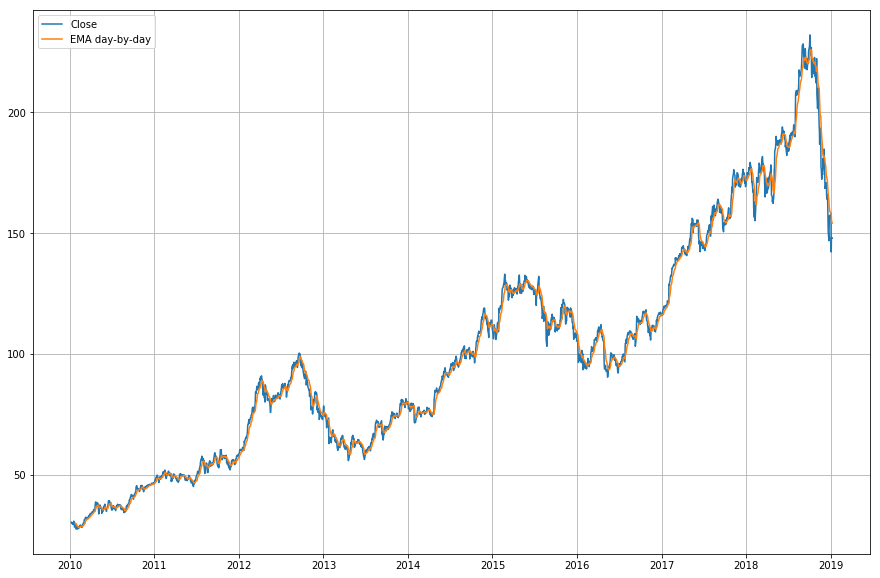

In [74]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'], label='Close')
plt.plot(df['EMA_DayByDay'], label='EMA day-by-day')
plt.legend(loc=2)
plt.show()

Looking closer

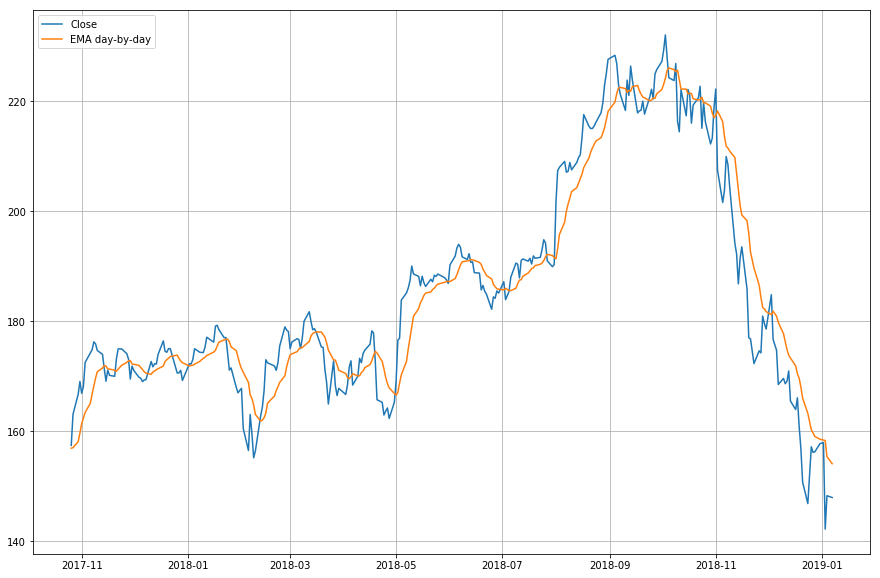

In [75]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'][-limit:], label='Close')
plt.plot(df['EMA_DayByDay'][-limit:], label='EMA day-by-day')
plt.legend(loc=2)
plt.show()

## Contratsing

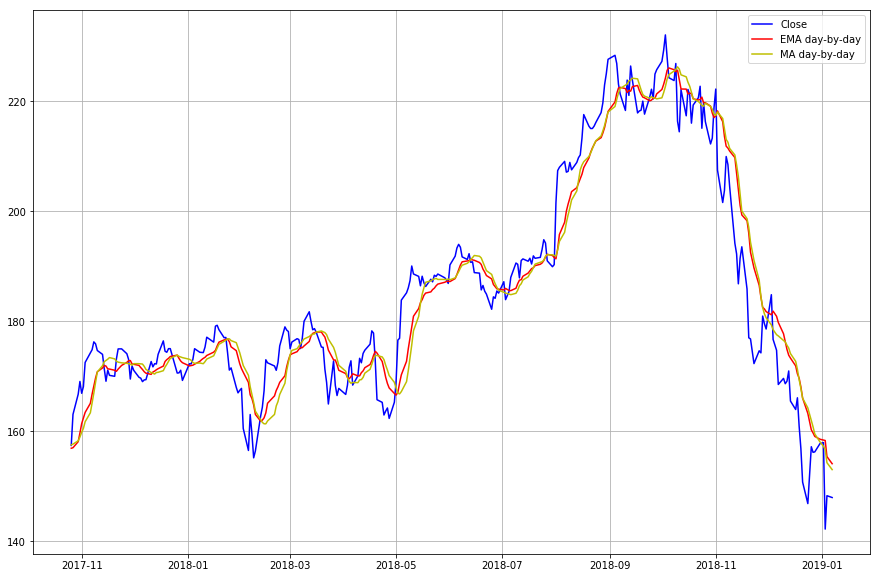

In [104]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'][-limit:], label='Close', color='b')
plt.plot(df['EMA_DayByDay'][-limit:], label='EMA day-by-day', color='r')
plt.plot(df['MA_window_10'][-limit:], label='MA day-by-day', color='y')

#Show the MA prediction
#size = len(df)-limit - (len(df)-limit)%forward_days
#for index in range(size, len(df), forward_days):
#    plt.plot(df['MA_window_10_forward_10'][index:index+forward_days], color='r', label='')
#plt.plot(df['MA_window_10_forward_10'][len(df)-1:], color='r', label='MA forward 10 days') #only to place the legend

plt.legend(loc='best')
plt.show()